In [68]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

folder = '../../AfterFailure/Gridsearch'

In [69]:
test_val = 'val'
csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        filename = file.split("_")
        # print(filename[0][-2:].isdigit())
        if filename[0][-2:].isdigit(): df['exp'] = filename[0][-2:]
        else: df['exp'] = filename[0][-1]
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

Total number of Nans: 23


In [70]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [71]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [72]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [73]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [74]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,surprisal_loss,list_index
count,5309.000000,5309.0,5309.000000,5309.0,5.309000e+03,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5309.000000,5286.000000,5309.000000,5309.000000,5309.000000
mean,42.825391,64.0,0.001366,32.0,2.500000e-04,0.017200,1.007346,0.703087,0.597269,0.713208,0.596962,0.525008,0.045674,0.056184,35.585986
std,30.783309,0.0,0.003057,0.0,5.421521e-20,0.034958,0.799010,0.117814,0.351186,0.126893,0.348246,0.139807,0.213782,0.143749,21.348068
min,0.000000,64.0,0.000001,32.0,2.500000e-04,0.000000,0.000000,0.492889,0.009201,0.488448,0.009239,0.260116,0.000022,0.000000,0.000000
25%,17.000000,64.0,0.000010,32.0,2.500000e-04,0.000100,0.000000,0.585938,0.300430,0.585804,0.305104,0.390306,0.001575,0.000132,17.000000
50%,36.000000,64.0,0.000100,32.0,2.500000e-04,0.001000,1.000000,0.711538,0.650675,0.716613,0.636548,0.583787,0.013160,0.001311,36.000000
75%,64.000000,64.0,0.001000,32.0,2.500000e-04,0.010000,2.000000,0.811198,0.999107,0.829527,0.999167,0.667520,0.034306,0.039789,54.000000
max,124.000000,64.0,0.010000,32.0,2.500000e-04,0.100000,2.000000,0.858474,1.000000,0.897970,1.000000,0.717025,2.303688,0.687550,73.000000


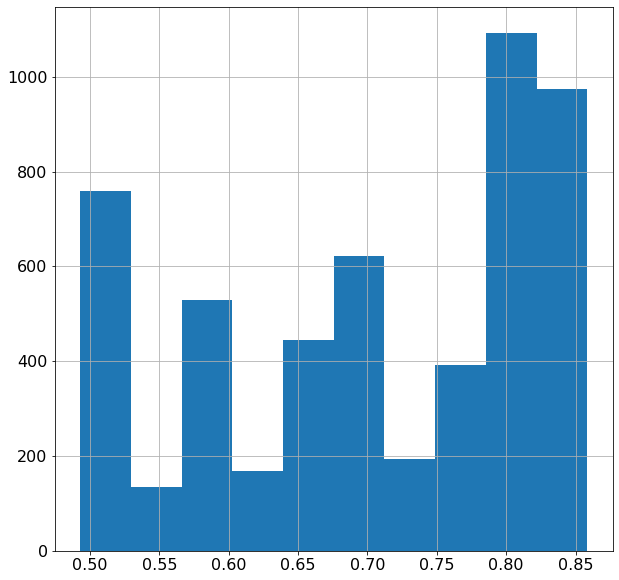

In [75]:
big_df['val_acc'].hist(figsize=(10, 10))

In [76]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, (test_val + '_acc')].max())
    best_rows.append(df.loc[df.loc[:, test_val + '_acc'].argmax()].to_dict())

In [77]:
best_df = pd.DataFrame(best_rows)
best_df = best_df.drop(columns= ["learning_rate", "hidden_units", "batch_size", "early_stopping"])

original = best_df[best_df['surprisal_cost'] == 0]
surprisal = best_df[best_df['surprisal_cost'] != 0]

In [78]:
print("No surprisal")
original

No surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,surprisal_loss,list_index,exp
0,99,0.001000,0.0,0,0.825421,0.325568,0.840545,0.310575,0.373079,0.071547,0.0,0,0
1,99,0.001000,0.0,1,0.833133,0.324010,0.840612,0.300526,0.370953,0.069232,0.0,1,0
2,50,0.001000,0.0,2,0.804387,0.323899,0.807292,0.317303,0.423025,0.073097,0.0,2,0
3,22,0.010000,0.0,0,0.588041,0.012794,0.577390,0.012584,0.673652,0.028990,0.0,3,0
4,24,0.010000,0.0,2,0.582432,0.010479,0.571381,0.010645,0.675198,0.024523,0.0,4,10
5,49,0.000010,0.0,0,0.845453,0.711011,0.844685,0.663304,0.359965,0.001528,0.0,5,10
6,94,0.000010,0.0,1,0.855268,0.798062,0.880743,0.775913,0.290202,0.001787,0.0,6,10
7,98,0.000010,0.0,2,0.851763,0.800462,0.867054,0.786517,0.326296,0.001812,0.0,7,10
23,123,0.000001,0.0,0,0.855769,0.875970,0.889690,0.874434,0.280855,0.000201,0.0,23,15
24,34,0.000001,0.0,1,0.709535,0.914011,0.692842,0.920133,0.608738,0.000212,0.0,24,15


In [79]:
print("With surprisal")
surprisal

With surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,surprisal_loss,list_index,exp
8,50,0.010000,0.1000,2,0.613081,0.018552,0.601429,0.018664,0.656518,0.042996,0.686658,8,11
9,10,0.000010,0.1000,0,0.678786,1.000000,0.667935,0.999998,0.634864,0.002304,0.016618,9,11
10,87,0.000010,0.1000,1,0.718049,0.999290,0.705395,0.999511,0.599830,0.002303,0.392359,10,11
11,64,0.000010,0.1000,2,0.694311,0.999987,0.689837,0.999886,0.612159,0.002303,0.092423,11,11
12,22,0.010000,0.0100,2,0.592748,0.013174,0.587607,0.012701,0.671316,0.029260,0.068657,12,12
13,77,0.000010,0.0100,0,0.662159,0.999626,0.646100,0.999258,0.641715,0.002302,0.040500,13,12
14,122,0.000010,0.0100,1,0.720152,0.998130,0.728098,0.998255,0.578905,0.002300,0.042786,14,12
15,21,0.000010,0.0100,2,0.690505,0.999998,0.681958,0.999999,0.620628,0.002304,0.000888,15,12
16,33,0.000010,0.0010,0,0.708333,0.999330,0.690772,0.999352,0.613294,0.002302,0.004043,16,13
17,67,0.000010,0.0010,1,0.721054,0.999322,0.710670,0.999204,0.594854,0.002302,0.004129,17,13


In [80]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,surprisal_loss,list_index,exp
61,6,0.010000,0.1000,1,0.584235,0.013731,0.572249,0.013273,0.676222,0.030577,0.686543,61,6
9,10,0.000010,0.1000,0,0.678786,1.000000,0.667935,0.999998,0.634864,0.002304,0.016618,9,11
27,12,0.000001,0.1000,1,0.510417,0.999874,0.513021,0.999930,0.688635,0.000230,0.353730,27,16
65,15,0.010000,0.0100,1,0.582332,0.012369,0.575855,0.011990,0.675256,0.027622,0.068653,65,7
20,15,0.000010,0.0001,0,0.661358,0.362574,0.643096,0.289639,0.647239,0.000667,0.000687,20,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,122,0.000010,0.0100,1,0.720152,0.998130,0.728098,0.998255,0.578905,0.002300,0.042786,14,12
23,123,0.000001,0.0000,0,0.855769,0.875970,0.889690,0.874434,0.280855,0.000201,0.000000,23,15
68,123,0.000100,0.0010,2,0.850060,0.743285,0.890091,0.697158,0.273068,0.016060,0.006856,68,8
70,123,0.000100,0.0001,0,0.855869,0.680365,0.884014,0.630347,0.289238,0.014521,0.000687,70,9


In [81]:
print("Dataframe with one per trials")
# mean_df = best_df.groupby(by=["cost_per_sample", "surprisal_cost"])
# sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="val_acc")
sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort=(test_val + "_acc"))
# sorted = best_df.groupby(["surprisal_cost"], sort="val_acc")
trial_mean = sorted.median().reset_index()
# trial_cps_mean = best_df.groupby(["surprisal_cost"], sort="val_acc").mean().reset_index()
trial_mean

Dataframe with one per trials


,cost_per_sample,surprisal_cost,epoch,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,surprisal_loss,list_index
0,0.000001,0.0000,34.0,1.0,0.709535,0.875970,0.692842,0.874434,0.608738,0.000201,0.000000,24.0
1,0.000001,0.0001,63.0,1.0,0.847456,0.816436,0.859241,0.825813,0.333312,0.000190,0.000686,36.0
2,0.000001,0.0010,48.0,1.0,0.723357,0.999952,0.716747,0.999959,0.589404,0.000230,0.002779,33.0
3,0.000001,0.0100,66.0,1.0,0.706330,0.999357,0.697316,0.999430,0.610662,0.000230,0.032759,30.0
4,0.000001,0.1000,15.0,1.0,0.513622,0.999874,0.513822,0.999874,0.688635,0.000230,0.371828,27.0
5,0.000010,0.0000,94.0,1.0,0.851763,0.798062,0.867054,0.775913,0.326296,0.001787,0.000000,6.0
6,0.000010,0.0001,114.0,1.0,0.852163,0.712259,0.884882,0.678831,0.288565,0.001564,0.000685,21.0
7,0.000010,0.0010,67.0,1.0,0.708333,0.999322,0.706130,0.999204,0.594854,0.002302,0.004129,17.0
8,0.000010,0.0100,77.0,1.0,0.690505,0.999626,0.681958,0.999258,0.620628,0.002302,0.040500,14.0
9,0.000010,0.1000,64.0,1.0,0.694311,0.999987,0.689837,0.999886,0.612159,0.002303,0.092423,10.0


In [82]:
trial_mean.columns

Index(['cost_per_sample', 'surprisal_cost', 'epoch', 'trial', 'val_acc',
       'val_updates', 'train_acc', 'train_updates', 'entropy_loss',
       'budget_loss', 'surprisal_loss', 'list_index'],
      dtype='object')

C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


-6.0 -2.0
0 0.0
5 0.25
10 0.5
15 0.75
20 1.0


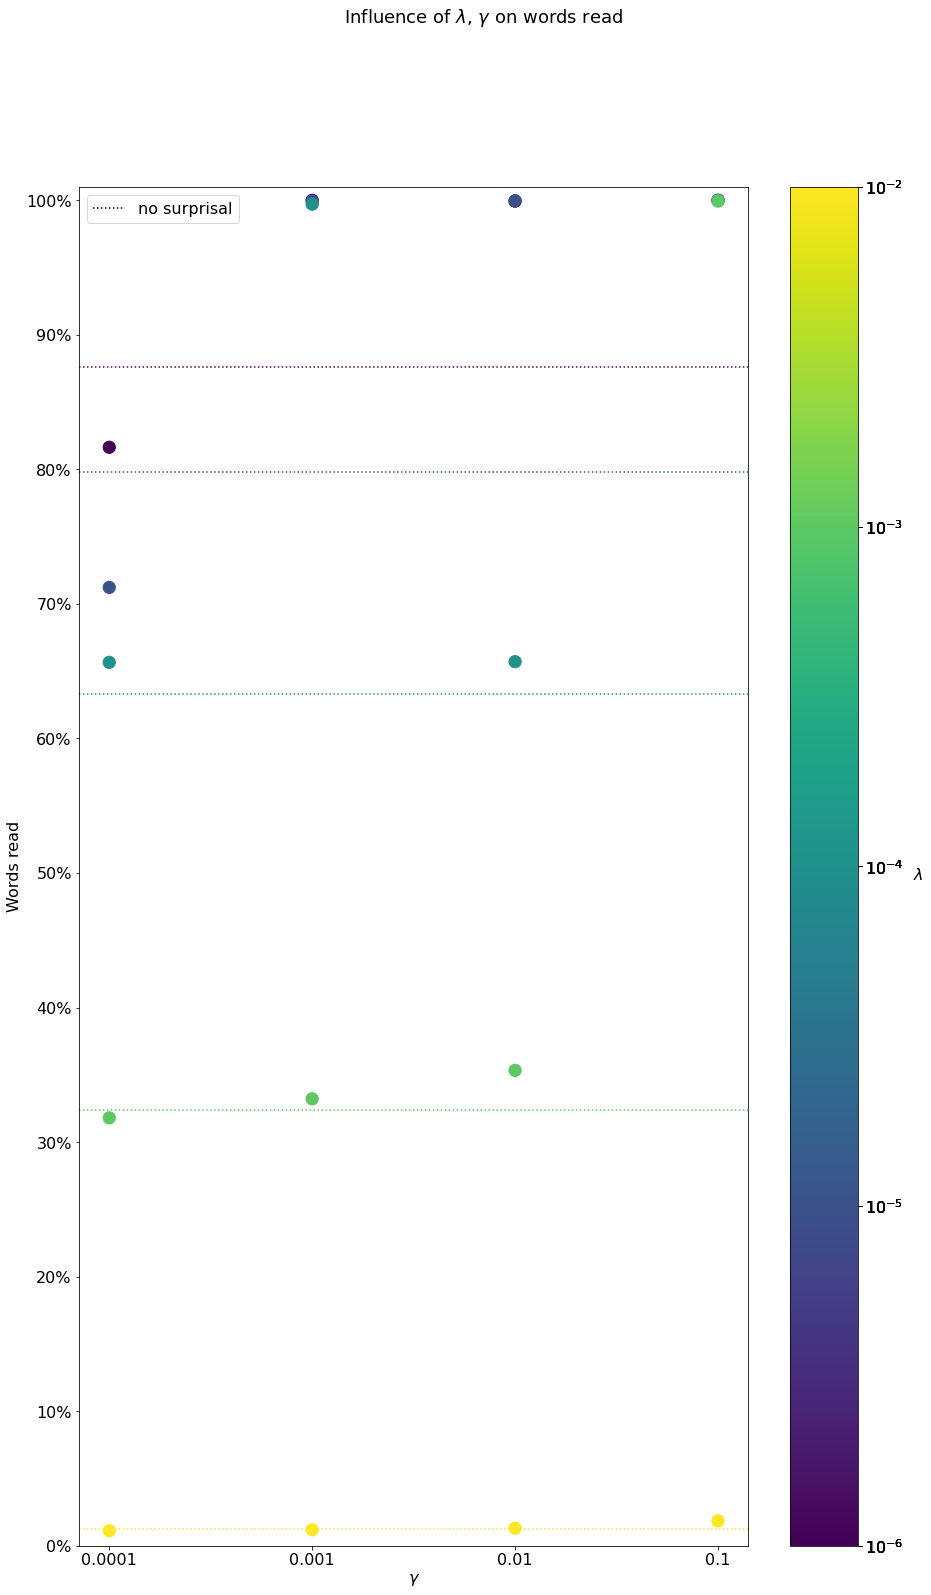

In [83]:
# Figure for last gridsearch.
# pd.set_option('display.float_format', '{:.2E}'.format)
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    a = int(a)
    return r'$10^{{{}}}$'.format(a)


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# trial_mean['val_acc'].corr(trial_mean['surprisal_cost'], method='pearson')
fig, ax = plt.subplots(figsize=(15, 25))
cax = ax.scatter(x=np.log10(trial_mean['surprisal_cost']), y=trial_mean['val_updates'], c=np.log10(trial_mean['cost_per_sample']), marker='o', s=150, cmap='viridis')
# ax.plot(np.log10(trial_cps_mean['surprisal_cost']), (trial_cps_mean['val_updates']/2520)*100, c='orange', label="mean")
min = np.log10(trial_mean['cost_per_sample'].min())
max = np.log10(trial_mean['cost_per_sample'].max())
print(min, max)
cmap = matplotlib.cm.get_cmap('viridis')
norm = matplotlib.colors.Normalize(vmin=min, vmax=max)
for id, row in trial_mean[trial_mean['surprisal_cost'] == 0].iterrows():
    print(id, norm(np.log10(row['cost_per_sample'])))
    ax.axhline(row['val_updates'], linestyle=':', color=cmap(norm(np.log10(row['cost_per_sample']))))
plt.xticks([-4, -3, -2, -1], [0.0001, 0.001, 0.01, 0.1])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])
plt.ylim((0, 1.01))
cbar = fig.colorbar(cax, ticks=np.log10(trial_mean['cost_per_sample']), format=ticker.FuncFormatter(fmt))
# cbar.ax.set_yticklabels(trial_mean['cost_per_sample'].apply(lambda x: '%1.0e'%x))
# cbar.ax.set_yticklabels(trial_mean['cost_per_sample'], format= '%.0e')
cbar.set_label(r"$\lambda$", rotation=0, labelpad=15, size=MEDIUM_SIZE)
ax.set_xlabel(r"$\gamma$")
ax.set_ylabel("Words read")
fig.suptitle(r"Influence of $\lambda$, $\gamma$ on words read")
plt.legend([Line2D([0],[0],linestyle=':', c="black")], ['no surprisal'])
plt.savefig("gridsearch_fig_updates.png")


In [84]:
# mean_df = mean_df.max()
# mean_df.sort_values(by='val_acc')
print("Clearer visualization")
# , axis=1, names=["acc_mean", "acc_std", "updates_mean",
# "updates_std"])
view = pd.DataFrame({'count': sorted[test_val + "_acc"].count(),
                     'acc_median': sorted[test_val + "_acc"].median(),
                     'acc_best': sorted[test_val + "_acc"].max(),
                     'acc_worst': sorted[test_val + "_acc"].min(),
                     'acc_std': sorted[test_val + "_acc"].std(),
                     'updates_median': sorted[test_val + "_updates"].median(),
                     'updates_std': sorted[test_val + "_updates"].std(),
                     'epoch_mean': sorted.epoch.mean()})
# view.rename(columns=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view[view['acc_median'] > 0.75]

Clearer visualization


count  acc_median  acc_best  acc_worst  \
cost_per_sample surprisal_cost                                           
0.000001        0.0001              3    0.847456  0.852664   0.699519   
0.000010        0.0000              3    0.851763  0.855268   0.845453   
                0.0001              3    0.852163  0.858474   0.661358   
0.000100        0.0000              3    0.846955  0.853466   0.846955   
                0.0001              3    0.854868  0.855869   0.658053   
0.001000        0.0000              3    0.825421  0.833133   0.804387   
                0.0001              3    0.823317  0.829127   0.820312   
                0.0010              3    0.828826  0.838141   0.815505   
                0.0100              3    0.827424  0.831931   0.811599   

                                 acc_std  updates_median  updates_std  \
cost_per_sample surprisal_cost                                          
0.000001        0.0001          0.086954        0.816436     0.143651   
0.000010        0.0000          0.004974        0.798062     0.050966   
                0.0001          0.112027        0.712259     0.224252   
0.000100        0.0000          0.003759        0.633213     0.062935   
                0.0001          0.113921        0.656580     0.249399   
0.001000        0.0000          0.014879        0.324010     0.000934   
                0.0001          0.004481        0.318044     0.005791   
                0.0010          0.011377        0.332170     0.004579   
                0.0100          0.010678        0.353332     0.020003   

                                epoch_mean  
cost_per_sample surprisal_cost              
0.000001        0.0001           69.000000  
0.000010        0.0000           80.333333  
                0.0001           82.000000  
0.000100        0.0000           77.000000  
                0.0001           73.000000  
0.001000        0.0000           82.666667  
                0.0001           82.000000  
                0.0010           87.333333  
                0.0100           75.666667

In [85]:
# lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

In [86]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    # df.loc[:, ['val_updates', 'train_updates']] = df[['val_updates', 'train_updates']] / 2520
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    a = df[['val_acc', 'train_acc']].plot(figsize= (20, 15), ax=ax1, legend=None)
    ax1.set_ylim(0, 1.01)
    ax1.set_ylabel("Accuracy")
    # ax1.legend(loc=2)
    lns = ax1.get_lines()
    ax2 = ax1.twinx()
    b = df['val_updates'].plot(ax=ax2, c='r', label="val_updates")
    c = df['train_updates'].plot(ax=ax2, c='g', label="train_updates")
    ax2.set_ylabel("Updates")
    ax2.set_xlabel("Epoch")
    ax2.set_ylim(0, 1.01)
    # lns.append(ax2.get_lines)
    # labs = [l.get_label() for l in lns]
    fig.legend(bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    fig.savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_cps{csvs[i].cost_per_sample[0]}_s{csvs[i].surprisal_cost[0]}_exp{csvs[i].exp[0]}.png")
    plt.clf()

C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [87]:
# if not os.path.exists(f"{folder}/lrplots"):
#     os.makedirs(f"{folder}/lrplots")
#
# for i, df in enumerate(lr0001):
#     df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")
#

In [88]:
# best_hyper = pd.concat(lr0001)
#
# best_hyper_diff = best_hyper['val_acc'].diff(15)
# best_hyper_diff.abs().mean()


In [89]:
# s_read_vocab = []
# s_skipped_vocab = []
# ns_read_vocab = []
# ns_skipped_vocab = []
#
# s_read_surp = []
# s_skipped_surp = []
# ns_read_surp = []
# ns_skipped_surp = []
#
# i=0
# for file in os.listdir(folder + '/analysis'):
#     file = folder + '/analysis/' + file
#     if "pkl" in file:
#         if "SC0.01" in file:
#             if "non" in file:
#                 s_skipped_vocab.append(pickle.load(open(file, 'rb')))
#             else:
#                 s_read_vocab.append(pickle.load(open(file, 'rb')))
#         else:
#             if "non" in file:
#                 ns_skipped_vocab.append(pickle.load(open(file, 'rb')))
#             else:
#                 ns_read_vocab.append(pickle.load(open(file, 'rb')))
#     else:
#         if "SC0.01" in file:
#             if "non" in file:
#                 s_skipped_surp.append(np.load(open(file, 'rb')))
#             else:
#                 s_read_surp.append(np.load(open(file, 'rb')))
#         else:
#             if "non" in file:
#                 ns_skipped_surp.append(np.load(open(file, 'rb')))
#             else:
#                 ns_read_surp.append(np.load(open(file, 'rb')))
#     i += 1
#
# print(f"{i} files were condsidered ({i/4} experiments)")
#

In [90]:
# nsr_surp = ns_read_surp[0]
# nss_surp = ns_skipped_surp[0]
#
# print(len(nss_surp))
# print(len(nsr_surp))
#
# print(nsr_surp.mean())
# print(nss_surp.mean())
#
# plt.hist(nss_surp)
# plt.hist(nsr_surp)
# plt.show()
#
#
#

In [91]:
# sr_surp = s_read_surp[0]
# ss_surp = s_skipped_surp[0]
#
# print(f"skipped length {len(ss_surp)}")
# print(f"read length {len(sr_surp)}")
#
# print(f"read surprisal {sr_surp.mean()}")
# print(f"skipped surprisal {ss_surp.mean()}")
#
# plt.hist(ss_surp)
# plt.hist(sr_surp)
# plt.show()
#
# # print(ss_surp)
#
# print(np.count_nonzero(sr_surp == 0))
# print(np.count_nonzero(ss_surp == 0))
#
# print(s_skipped_vocab)
# print(s_read_vocab)
#